# i. Introduction
Marchelly Gideon Tambunan

# ii. Import Library

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from kneed import KneeLocator
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn import metrics
from sklearn.metrics import silhouette_score,silhouette_samples,calinski_harabasz_score
import joblib
import warnings
warnings.simplefilter("ignore")

In [2]:
def plot_silhouette(model,range_n_clusters,X,model_name):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = model(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')


        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle((f"Silhouette analysis for {model_name} clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

# iii. SQL Query

SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_004_hck.credit-card-information` 
WHERE MOD(CUST_ID, 2) = 0;

# iv. Data Loading

In [3]:
df = pd.read_csv('h8dsft_P1G4_Marchelly_Gideon.csv',na_values=[" ", "-", "?" ,"n/a", "na", "--"," ?"])
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,NaN,0.000000,8
1,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
2,2322,1.979916,0.125000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,NaN,0.000000,8
3,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
4,3976,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


In [4]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875000,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125000,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
5,4266,2237.238086,1.000000,120.0,120.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
6,4360,2730.843802,1.000000,2900.0,2900.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2900.0,0.000000,NaN,0.0,8
7,4680,424.994385,0.375000,1200.0,1200.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1200.0,57.266292,56.720210,0.0,8
8,5884,18.885677,0.375000,57.0,57.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
9,24,0.004816,0.545455,51.7,0.0,51.7,0.0,0.250,0.000,0.250,0.0,0,3,3000.0,33.249088,0.059481,0.0,12


In [5]:
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,1588,538.768762,0.909091,226.95,129.58,97.37,452.009130,0.545455,0.090909,0.454545,0.272727,8,9,1200.0,946.649324,211.220001,0.000000,11
4466,6900,7468.012010,1.000000,1569.41,796.07,773.34,4500.288676,0.545455,0.454545,0.363636,0.272727,7,10,8700.0,2162.943350,4628.802111,0.000000,11
4467,2528,427.642111,0.888889,0.00,0.00,0.00,2563.705644,0.000000,0.000000,0.000000,0.888889,62,0,1200.0,2853.967334,146.976542,0.500000,9
4468,1226,706.327578,0.888889,169.54,169.54,0.00,1406.735573,0.333333,0.333333,0.000000,0.888889,14,3,2500.0,302.976780,142.597254,0.000000,9
4469,2152,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [7]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
# Calculate the percentage of missing values in the entire DataFrame
percent_missing = df.isnull().sum().sum() / df.shape[0]  * 100

# Print the result
print("Percentage of missing values: {:.2f}%".format(percent_missing))

Percentage of missing values: 3.55%


In [9]:
df.dropna(axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
1,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
2,3976,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8
3,4266,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2500.0,343.102984,712.986387,0.000000,8
4,4680,424.994385,0.375000,1200.00,1200.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,57.266292,56.720210,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4311,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4312,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4313,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4314,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


In [10]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
data = df.copy()
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
1,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
2,3976,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8
3,4266,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2500.0,343.102984,712.986387,0.000000,8
4,4680,424.994385,0.375000,1200.00,1200.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,57.266292,56.720210,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4311,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4312,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4313,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4314,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


# iv. Exploratory Data Analysis

pada bagian ini, kita akan melakukan sedikit eksplorasi untuk memahami data yang kita miliki

kita akan cek terlebih dahulu jumlah unique values

In [13]:
data.nunique()

CUST_ID                             4316
BALANCE                             4313
BALANCE_FREQUENCY                     38
PURCHASES                           3118
ONEOFF_PURCHASES                    2022
INSTALLMENTS_PURCHASES              2292
CASH_ADVANCE                        2091
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            44
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                46
CASH_ADVANCE_TRX                      55
PURCHASES_TRX                        147
CREDIT_LIMIT                         151
PAYMENTS                            4316
MINIMUM_PAYMENTS                    4316
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

selanjutnya kita akan melihat hasil statistik deskriptif pada setiap kolom

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,4316.0,4474.638554,2589.259871,2.000000,2241.500000,4475.000000,6712.500000,8950.000000
BALANCE,4316.0,1600.114511,2107.347942,0.000000,152.877191,916.693628,2112.447004,19043.138560
BALANCE_FREQUENCY,4316.0,0.895236,0.206730,0.000000,0.909091,1.000000,1.000000,1.000000
PURCHASES,4316.0,1025.274057,2241.729131,0.000000,44.662500,379.300000,1149.940000,49039.570000
ONEOFF_PURCHASES,4316.0,600.770438,1690.105736,0.000000,0.000000,35.955000,600.000000,40761.250000
INSTALLMENTS_PURCHASES,4316.0,424.888909,940.627467,0.000000,0.000000,95.845000,498.592500,22500.000000
CASH_ADVANCE,4316.0,986.980658,2159.134558,0.000000,0.000000,0.000000,1110.248526,29282.109150
PURCHASES_FREQUENCY,4316.0,0.495675,0.399564,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,4316.0,0.205447,0.299252,0.000000,0.000000,0.083333,0.333333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,4316.0,0.369805,0.398217,0.000000,0.000000,0.181818,0.750000,1.000000


terlihat ada beberapa kolom yang sepertinya memiliki distribusi tidak normal karena nilai mean dan standar deviasi berjarak cukup jauh

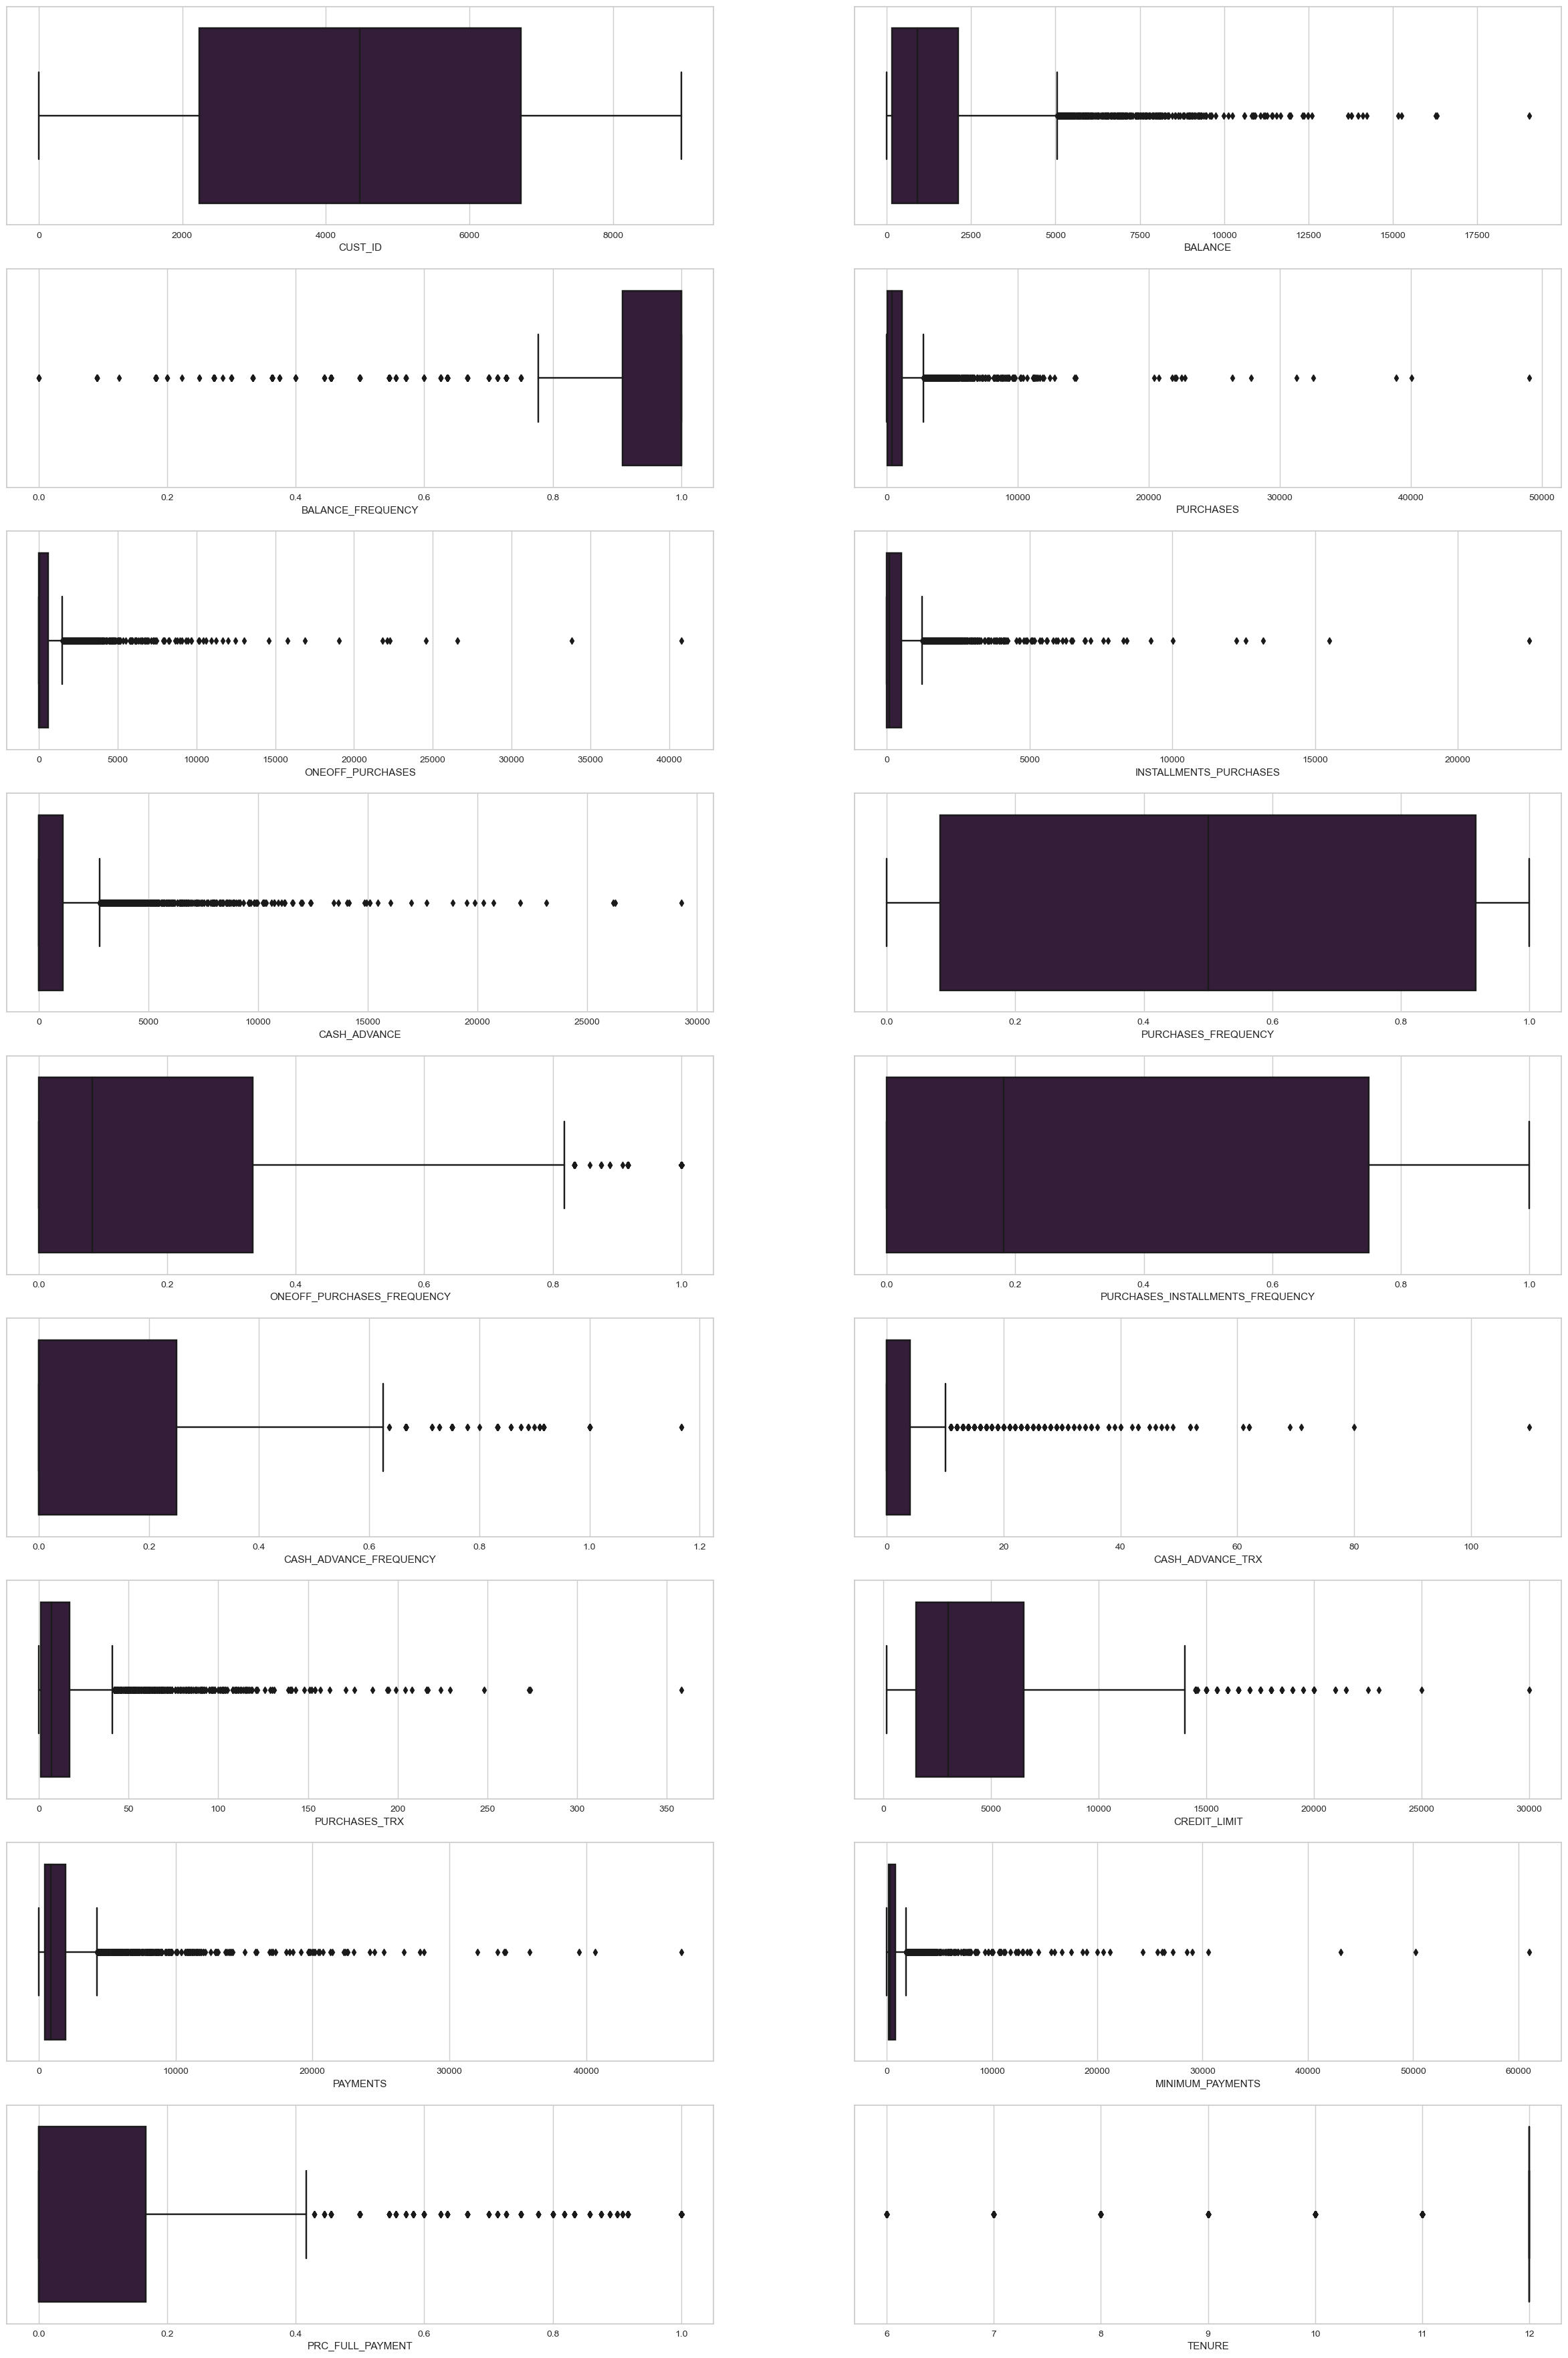

In [15]:
plt.figure(figsize=(30,45))
for a,col in enumerate(df.columns):
    ax = plt.subplot(9,2,a+1)
    sns.set_palette("rocket")
    sns.boxplot(data[col],ax=ax)
    plt.xlabel(col)

terlihat dari hasil boxplot ada beberapa kolom yang memiliki outliers cukup banyak. kita akan melakukan handle outlier nanti

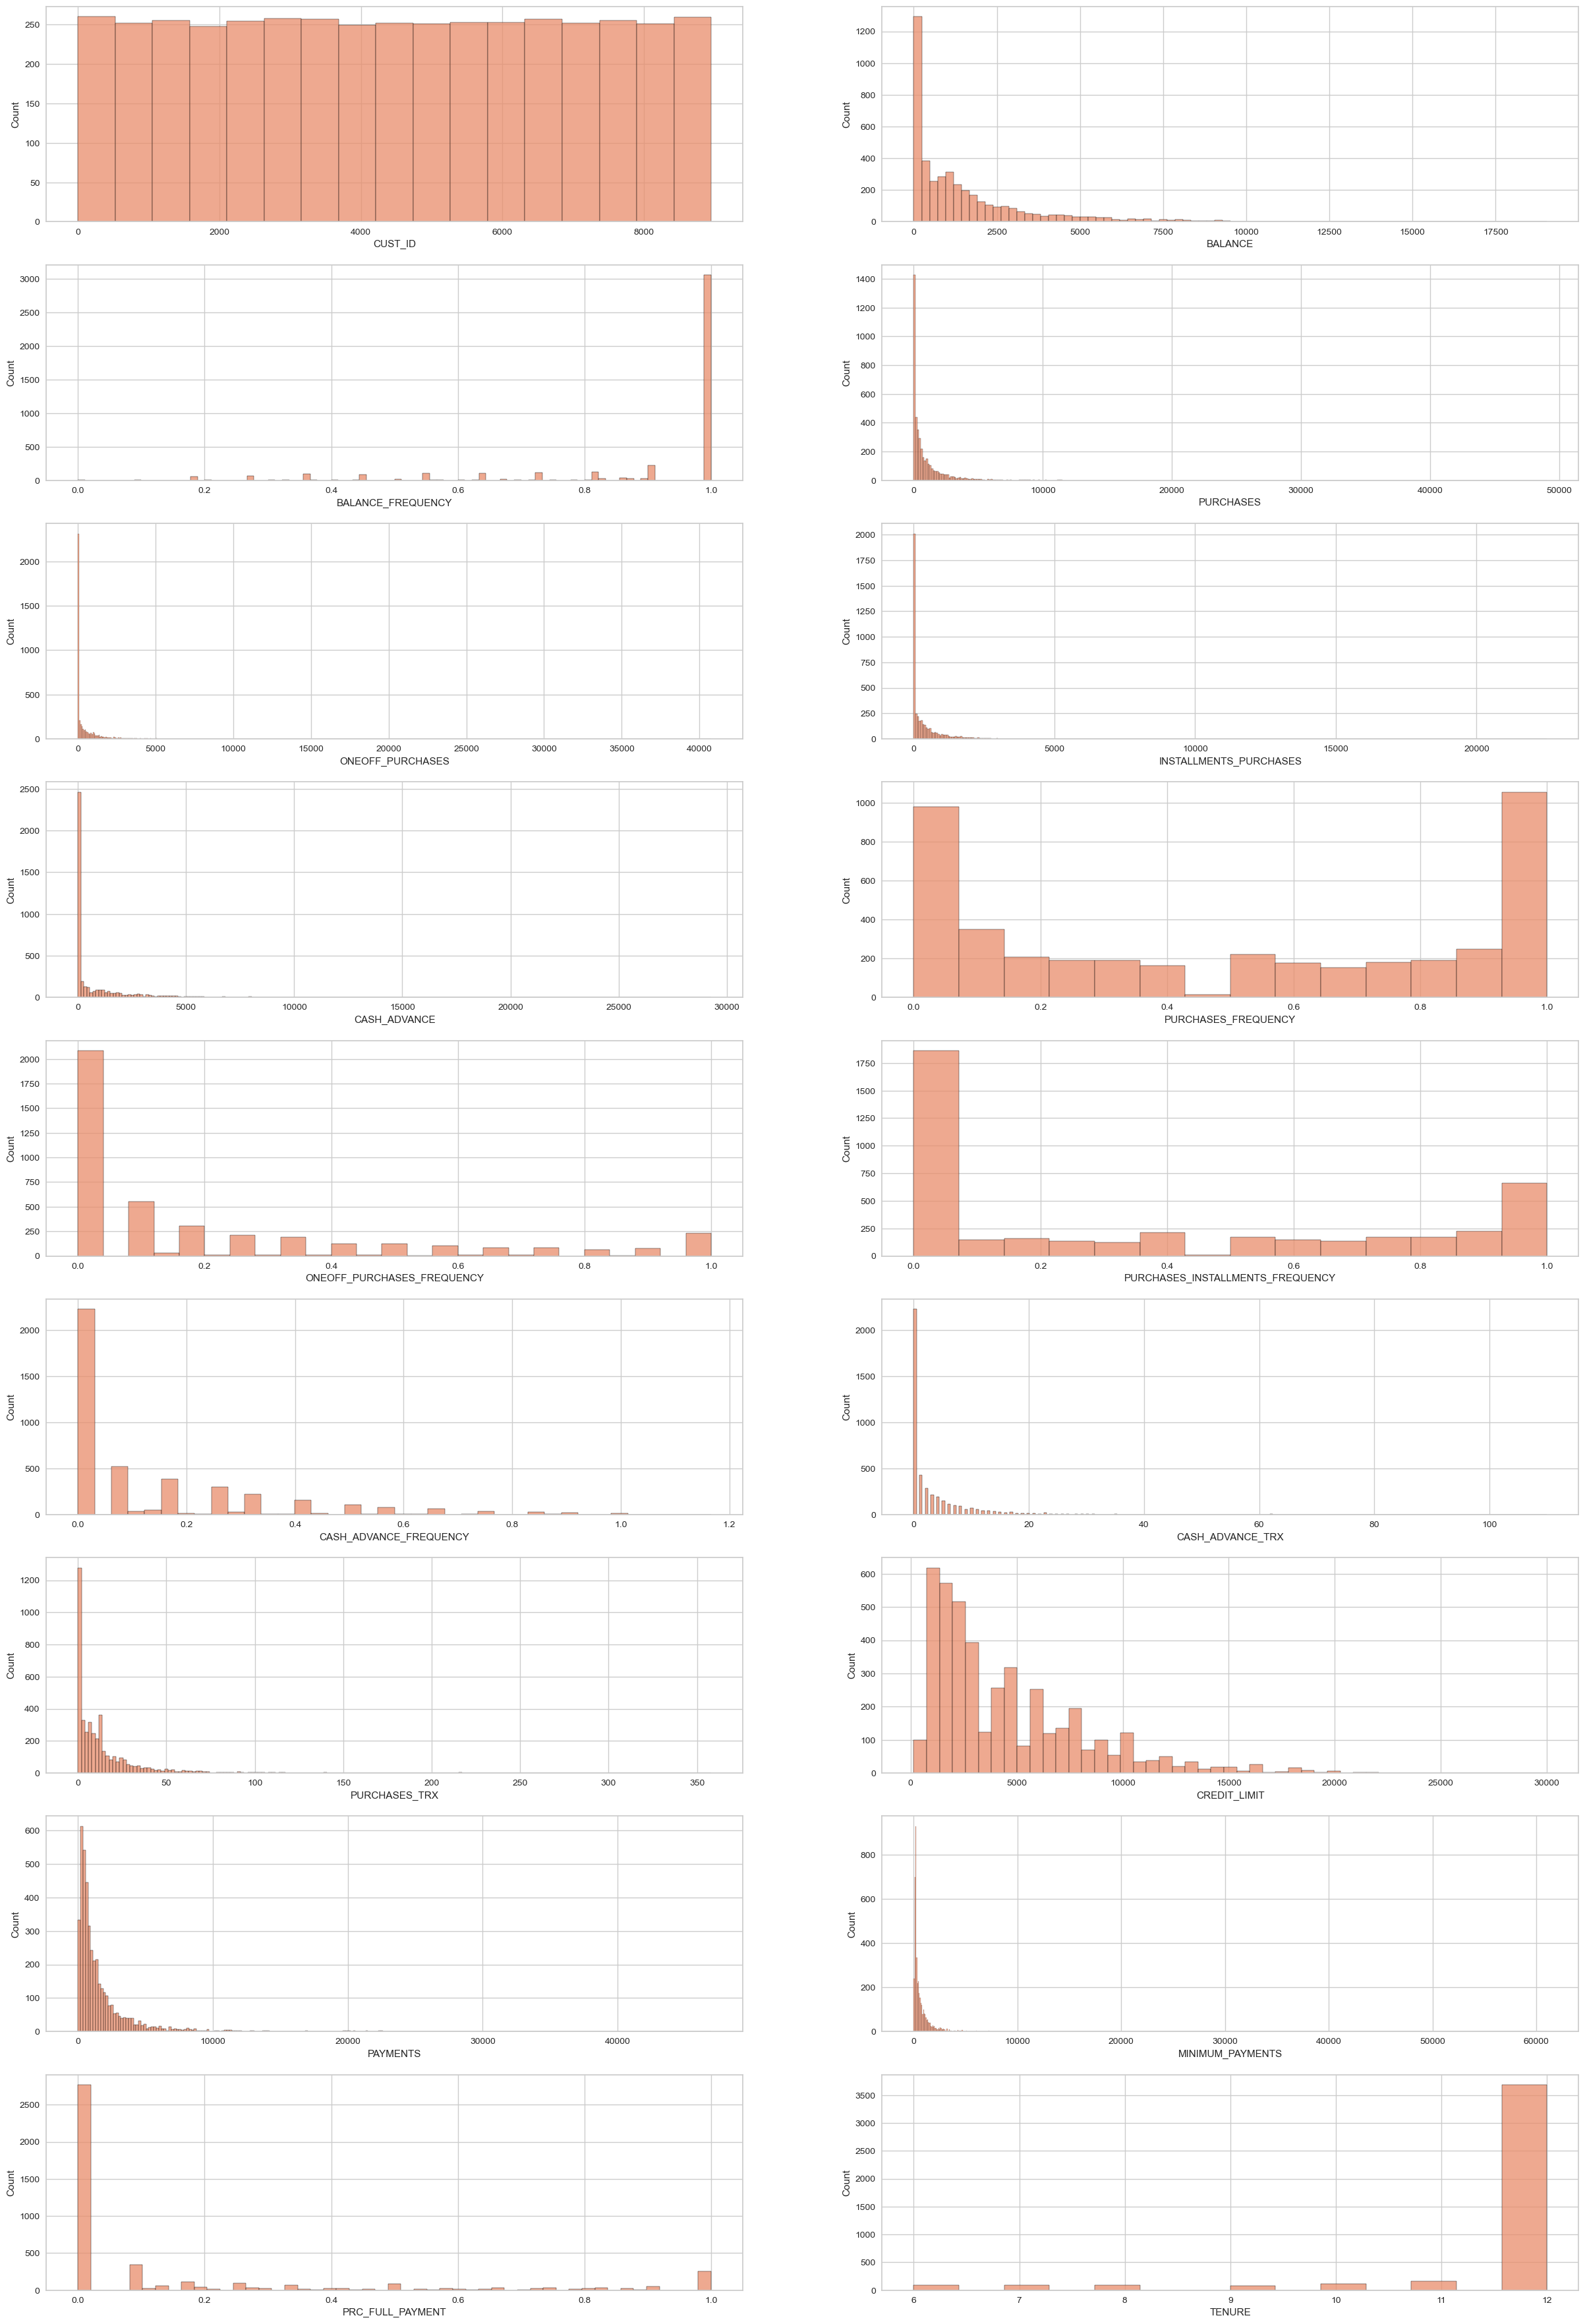

In [16]:
plt.figure(figsize=(30,45))
for i,col in enumerate(data.columns):
    sns.set_palette("flare")
    ax = plt.subplot(9,2,i+1)
    sns.histplot(data[col],ax=ax)
    plt.xlabel(col)

pada hasil histogram, terlihat beberapa kolom memiliki pola yang hampir mirip dengan yang lainnya

# v. Data Preprocessing

karena kita tidak akan menggunakan kolom cust_id. jadi kita akan menghapusnya

In [17]:
data.drop(['CUST_ID'], axis = 1,inplace=True)

sekarang kita akan memasuki tahap scaling pada data

### Featues Scaling

Kita akan melakukan scaling menggunakan metode standardscaler karena tidak sensitif pada outlier

In [18]:
# Scaling the data using quintile transformer
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)
data_scaled

array([[-0.31157956, -0.09789656, -0.41145958, ..., -0.19257025,
        -0.5439301 , -2.66644606],
       [-0.54039046,  0.50682837, -0.19642207, ..., -0.3047759 ,
        -0.5439301 , -2.66644606],
       [-0.25937013,  0.50682837,  0.1894855 , ..., -0.27206364,
        -0.5439301 , -2.66644606],
       ...,
       [ 0.84778755,  0.50682837, -0.20713825, ...,  0.01362574,
        -0.5439301 , -0.40131395],
       [ 1.5378602 ,  0.50682837,  0.25459011, ...,  0.6600379 ,
        -0.24056163, -0.40131395],
       [ 0.17886759,  0.50682837,  0.00301853, ...,  0.02431666,
        -0.24056163, -0.40131395]])

setelah kita melakukan scaling, kita akan memasukan hasil scaling pada dataframe

In [19]:
scaled_data = pd.DataFrame(data=data_scaled,columns=data.columns)
scaled_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.311580,-0.097897,-0.411460,-0.294554,-0.451760,-0.457172,-0.927807,-0.268859,-0.928760,-0.679523,-0.494608,-0.564026,-0.955537,-0.524061,-0.192570,-0.543930,-2.666446
1,-0.540390,0.506828,-0.196422,-0.009332,-0.451760,-0.457172,-0.927807,-0.268859,-0.928760,-0.679523,-0.494608,-0.564026,-0.955537,-0.509809,-0.304776,-0.543930,-2.666446
2,-0.259370,0.506828,0.189485,0.502529,-0.451760,-0.457172,-0.927807,-0.268859,-0.928760,-0.679523,-0.494608,-0.564026,-0.819978,-0.463406,-0.272064,-0.543930,-2.666446
3,0.302369,0.506828,-0.403875,-0.284495,-0.451760,-0.457172,-0.927807,-0.268859,-0.928760,-0.679523,-0.494608,-0.564026,-0.548860,-0.481422,-0.061411,-0.543930,-2.666446
4,-0.557694,-2.516796,0.077952,0.354593,-0.451760,-0.457172,-0.927807,-0.268859,-0.928760,-0.679523,-0.494608,-0.564026,-0.901314,-0.576804,-0.345956,-0.543930,-2.666446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4311,-0.247309,0.506828,-0.457412,-0.355504,-0.451760,0.126265,-1.240685,-0.686616,-0.928760,2.041122,0.874003,-0.604891,-0.901314,-0.135536,-0.252890,-0.240562,-0.401314
4312,-0.375174,0.067029,-0.457412,-0.355504,-0.451760,1.312109,-1.240685,-0.686616,-0.928760,2.041122,0.569867,-0.604891,-0.101515,0.863052,-0.265776,-0.240562,-0.401314
4313,0.847788,0.506828,-0.207138,-0.102698,-0.309541,0.473010,1.262334,1.743970,-0.015494,2.041122,0.874003,0.212424,1.511638,-0.249204,0.013626,-0.543930,-0.401314
4314,1.537860,0.506828,0.254590,0.588883,-0.451760,1.562078,-0.102950,0.832498,-0.928760,2.041122,2.090546,0.416753,0.400053,-0.293637,0.660038,-0.240562,-0.401314


### Handling Outlier

Pada saat handling outlier, kita menggunakan local outlier factor. kita menggunakan metode tersebut karena kita tidak perlu membeda-bedakan antara kolom yang memiliki skewness tinggi maupun rendah.

In [20]:
#Setting up the model. K is set by passing the n_neighbors parameter with integer. 20 is often considered good already to detect an outlier. By default the distance metric is Euclidean distance.
lof = LocalOutlierFactor(n_neighbors = 20,contamination=.03)
#Training the model, I drop few columns that was not a continuous variable
data['lof'] = lof.fit_predict(data_scaled)
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,lof
0,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8,1
1,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8,1
2,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8,1
3,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2500.0,343.102984,712.986387,0.000000,8,1
4,424.994385,0.375000,1200.00,1200.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,57.266292,56.720210,0.000000,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4311,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11,1
4312,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11,1
4313,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11,1
4314,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11,1


sekarang kita akan melihat nilai outlier yang bernilai -1

In [21]:
data.lof.value_counts()

 1    4186
-1     130
Name: lof, dtype: int64

sekarang kita akan melakukan drop pada outlier

In [22]:
outlier = data[data['lof'] == -1].index
outlier

Int64Index([  23,   34,   51,   75,   91,  140,  174,  179,  231,  243,
            ...
            4091, 4105, 4106, 4148, 4151, 4185, 4229, 4265, 4291, 4308],
           dtype='int64', length=130)

In [23]:
scaled_data.drop(index=outlier, inplace=True)
scaled_data.reset_index(inplace=True,drop=True)
scaled_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.311580,-0.097897,-0.411460,-0.294554,-0.451760,-0.457172,-0.927807,-0.268859,-0.928760,-0.679523,-0.494608,-0.564026,-0.955537,-0.524061,-0.192570,-0.543930,-2.666446
1,-0.540390,0.506828,-0.196422,-0.009332,-0.451760,-0.457172,-0.927807,-0.268859,-0.928760,-0.679523,-0.494608,-0.564026,-0.955537,-0.509809,-0.304776,-0.543930,-2.666446
2,-0.259370,0.506828,0.189485,0.502529,-0.451760,-0.457172,-0.927807,-0.268859,-0.928760,-0.679523,-0.494608,-0.564026,-0.819978,-0.463406,-0.272064,-0.543930,-2.666446
3,0.302369,0.506828,-0.403875,-0.284495,-0.451760,-0.457172,-0.927807,-0.268859,-0.928760,-0.679523,-0.494608,-0.564026,-0.548860,-0.481422,-0.061411,-0.543930,-2.666446
4,-0.557694,-2.516796,0.077952,0.354593,-0.451760,-0.457172,-0.927807,-0.268859,-0.928760,-0.679523,-0.494608,-0.564026,-0.901314,-0.576804,-0.345956,-0.543930,-2.666446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,-0.247309,0.506828,-0.457412,-0.355504,-0.451760,0.126265,-1.240685,-0.686616,-0.928760,2.041122,0.874003,-0.604891,-0.901314,-0.135536,-0.252890,-0.240562,-0.401314
4182,-0.375174,0.067029,-0.457412,-0.355504,-0.451760,1.312109,-1.240685,-0.686616,-0.928760,2.041122,0.569867,-0.604891,-0.101515,0.863052,-0.265776,-0.240562,-0.401314
4183,0.847788,0.506828,-0.207138,-0.102698,-0.309541,0.473010,1.262334,1.743970,-0.015494,2.041122,0.874003,0.212424,1.511638,-0.249204,0.013626,-0.543930,-0.401314
4184,1.537860,0.506828,0.254590,0.588883,-0.451760,1.562078,-0.102950,0.832498,-0.928760,2.041122,2.090546,0.416753,0.400053,-0.293637,0.660038,-0.240562,-0.401314


In [24]:
data.drop(index=outlier, inplace=True)
data.reset_index(inplace=True,drop=True)
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,lof
0,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8,1
1,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8,1
2,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8,1
3,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2500.0,343.102984,712.986387,0.000000,8,1
4,424.994385,0.375000,1200.00,1200.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,57.266292,56.720210,0.000000,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11,1
4182,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11,1
4183,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11,1
4184,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11,1


### Checking VIF

pada bagian ini, kita akan melihat kolom yang memiliki nilai multicolinearity yang tinggi

In [25]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns.to_list()
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [26]:
calc_vif(scaled_data)

,variables,VIF
0,BALANCE,2.659921
1,BALANCE_FREQUENCY,1.326335
2,PURCHASES,23521.727166
3,ONEOFF_PURCHASES,13547.549127
4,INSTALLMENTS_PURCHASES,5150.944440
5,CASH_ADVANCE,3.324160
6,PURCHASES_FREQUENCY,11.043041
7,ONEOFF_PURCHASES_FREQUENCY,4.527963
8,PURCHASES_INSTALLMENTS_FREQUENCY,10.482884
9,CASH_ADVANCE_FREQUENCY,4.267601


terdapat beberapa kolom yang memiliki nilai multicolinearity tinggi. jadi kita akan mengurangi dimensi pada data menggunakan PCA

### PCA

kita lihat terlebih dahulu visualisasi dari variance ratio pada data

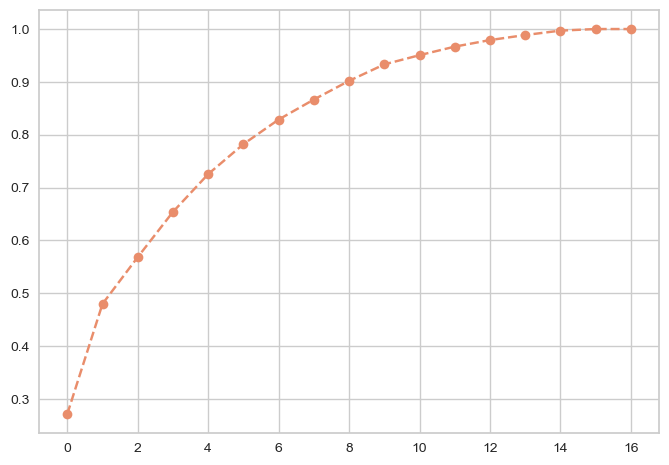

In [27]:
pca=PCA()
pca.fit(scaled_data)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(cumsum,'o--')
plt.grid(True)
plt.show()

karena kita akan mempertahankan informasi dari data sebesar 90%. jadi kita akan memilih n component sebesar 8

In [28]:
np.cumsum(pca.explained_variance_ratio_)

array([0.27156701, 0.47997008, 0.56844459, 0.65402758, 0.72551175,
       0.78218127, 0.82872628, 0.86661545, 0.90197265, 0.93310965,
       0.95054184, 0.96671261, 0.9791238 , 0.98864054, 0.99697672,
       0.99999919, 1.        ])

setelah itu, kita akan fit transform pada data scaled dengan parameter n component sebesar 8

In [29]:
# Defining PCA
pca = PCA(n_components=8)
# Training pca and transforming our scaled data.
data_pca = pca.fit_transform(scaled_data)

setelah itu, kita lihat persebaran data yang ada pada data kita

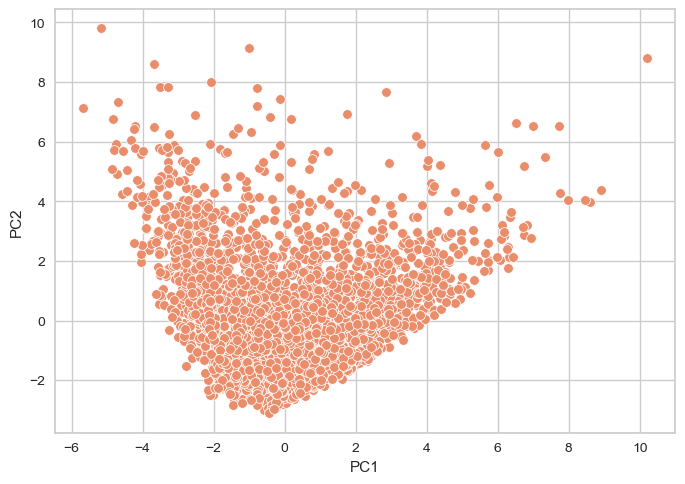

In [30]:
# Using PC1 and PC2 to plot our data
pca_data = pd.DataFrame(data=data_pca[:,0:2],columns=['PC1','PC2'])
sns.scatterplot(x=pca_data['PC1'],y=pca_data['PC2']);

# vi. K-Means

### K-Value using Elbow Method

pada bagian ini kita akan mencari nilai K dengan metode elbow

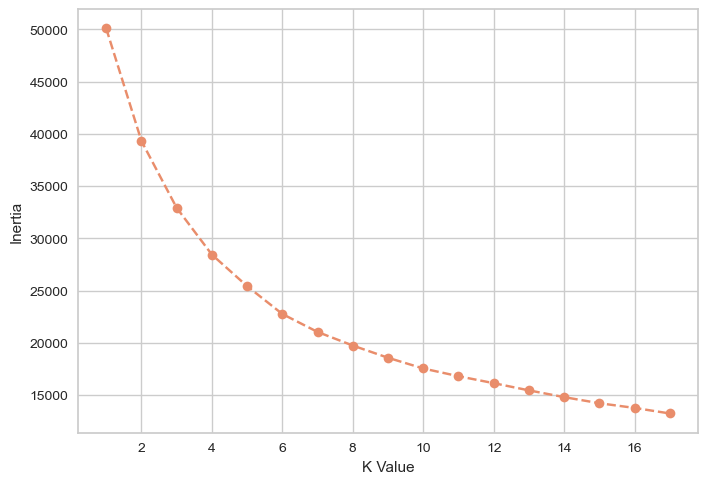

In [31]:
# Plotting elbow method to find the optimal number of cluster
K=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
inertia=[KMeans(n_clusters=i,random_state=69).fit(data_pca).inertia_ for i in K]
plt.plot(K,inertia,'o--')
plt.xlabel('K Value')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

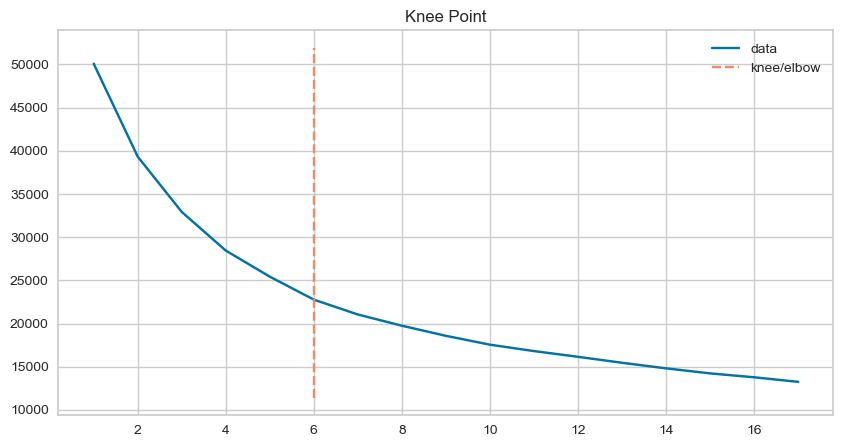

In [32]:
K=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
kneedle = KneeLocator(K,inertia,curve="convex", direction='decreasing')
kneedle.plot_knee(figsize=(10,5))

pada hasil ini terlihat bahwa dengan metode elbow, nilai K berada pada 6

### K-Values Using Shilouette Score

sekarang kita akan mencari nilai K menggunakan metode Shilouette Score dengan parameter K dari 2 hingga 6

For n_clusters = 2 The average silhouette_score is : 0.23339675460659987
For n_clusters = 3 The average silhouette_score is : 0.23242948589517232
For n_clusters = 4 The average silhouette_score is : 0.2315816472886878
For n_clusters = 5 The average silhouette_score is : 0.24485973588596105
For n_clusters = 6 The average silhouette_score is : 0.2635927433907038


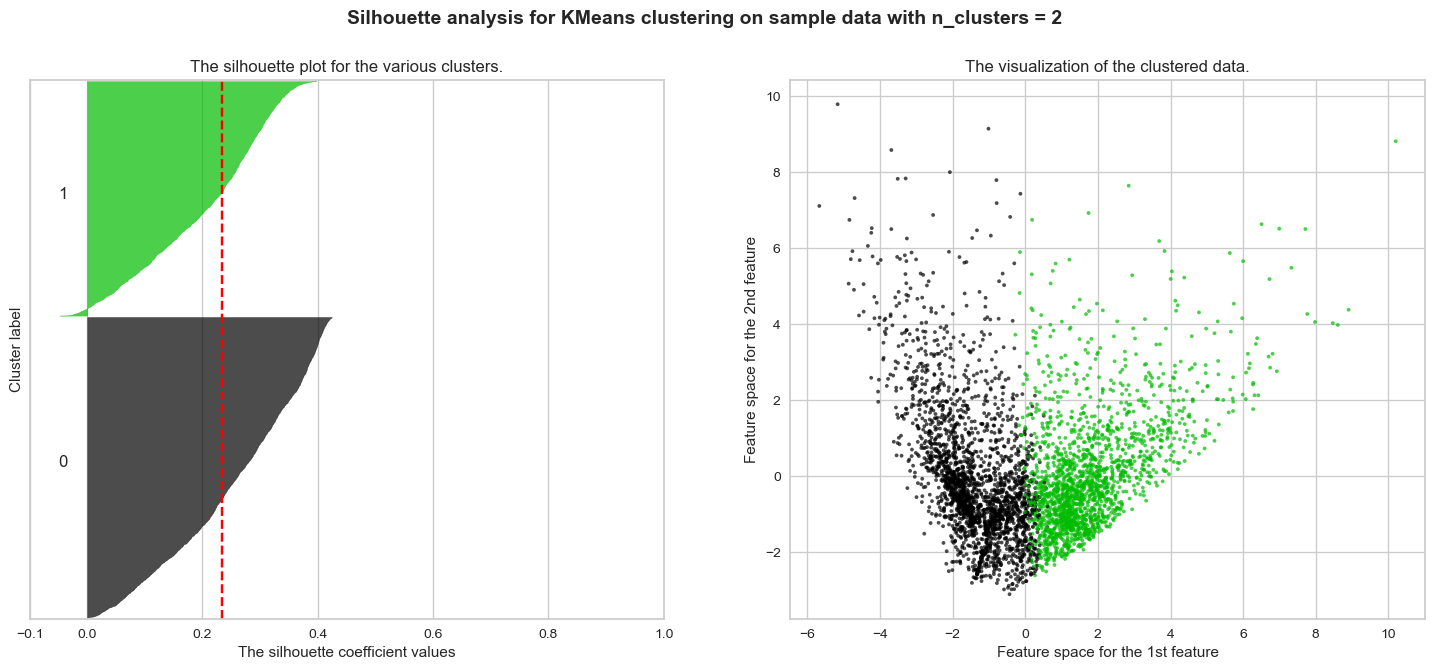

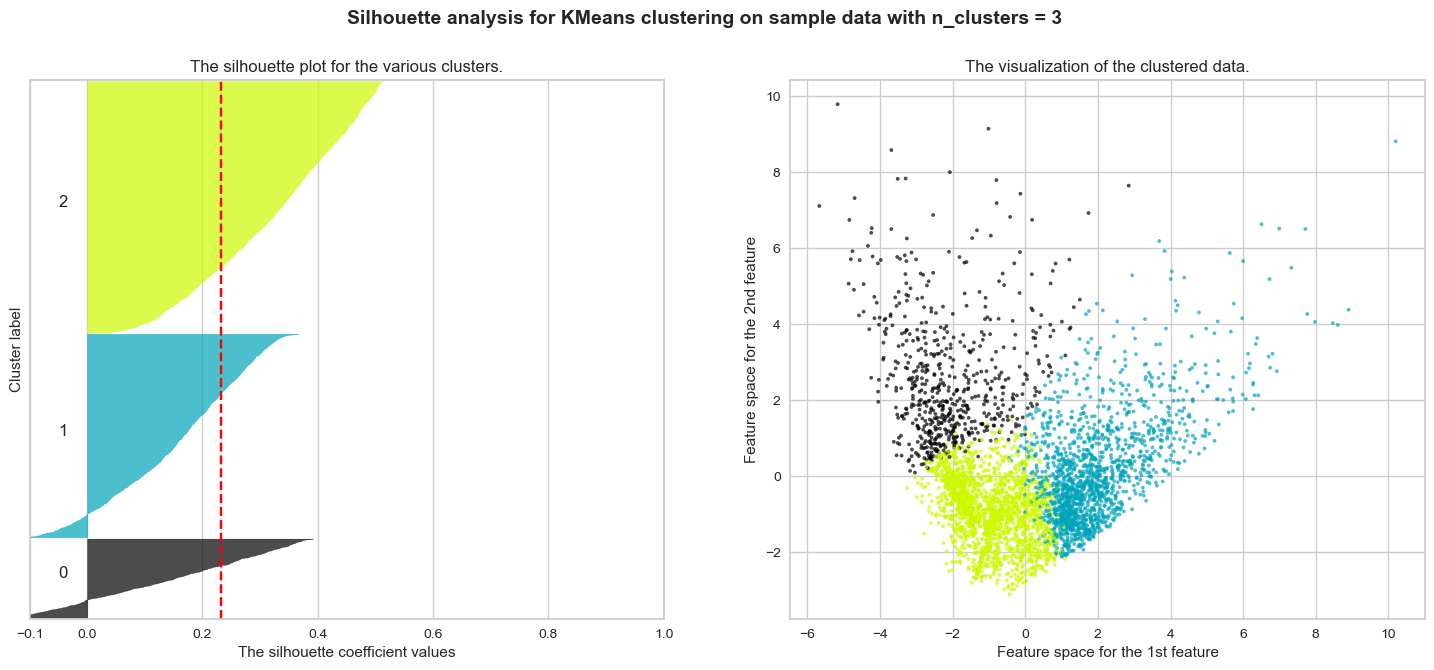

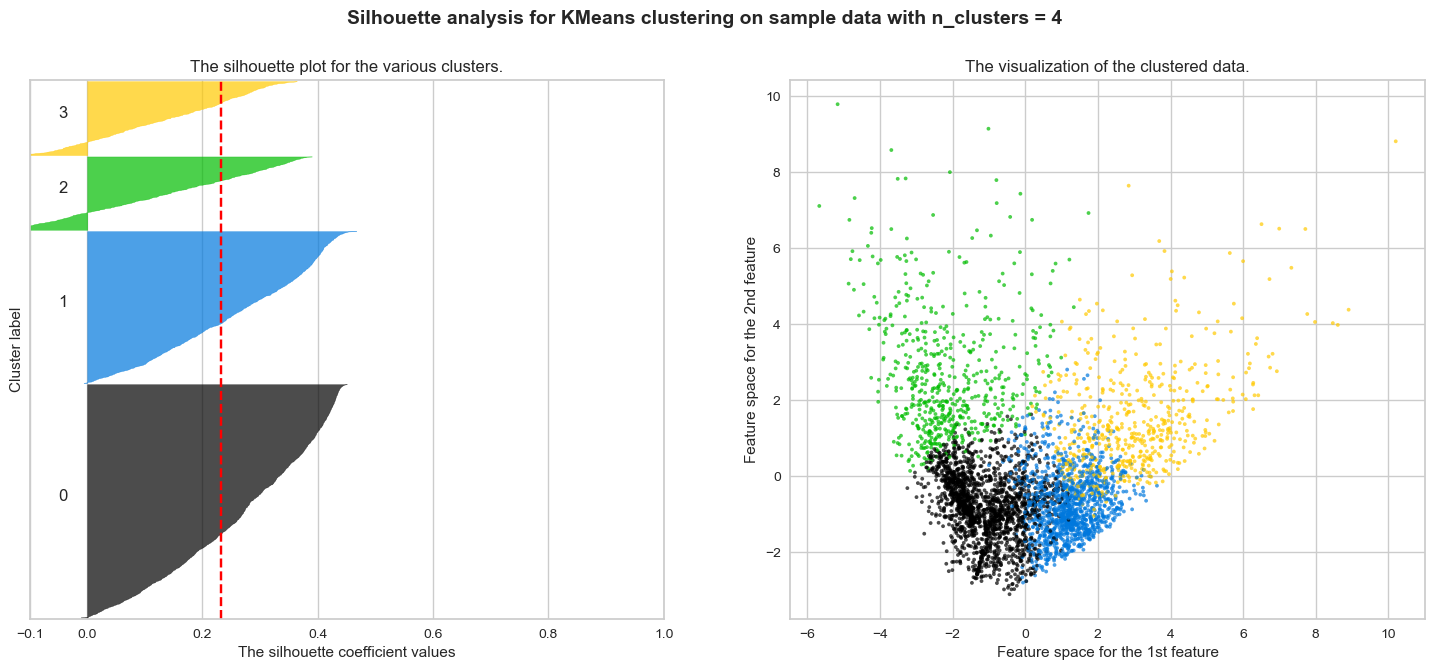

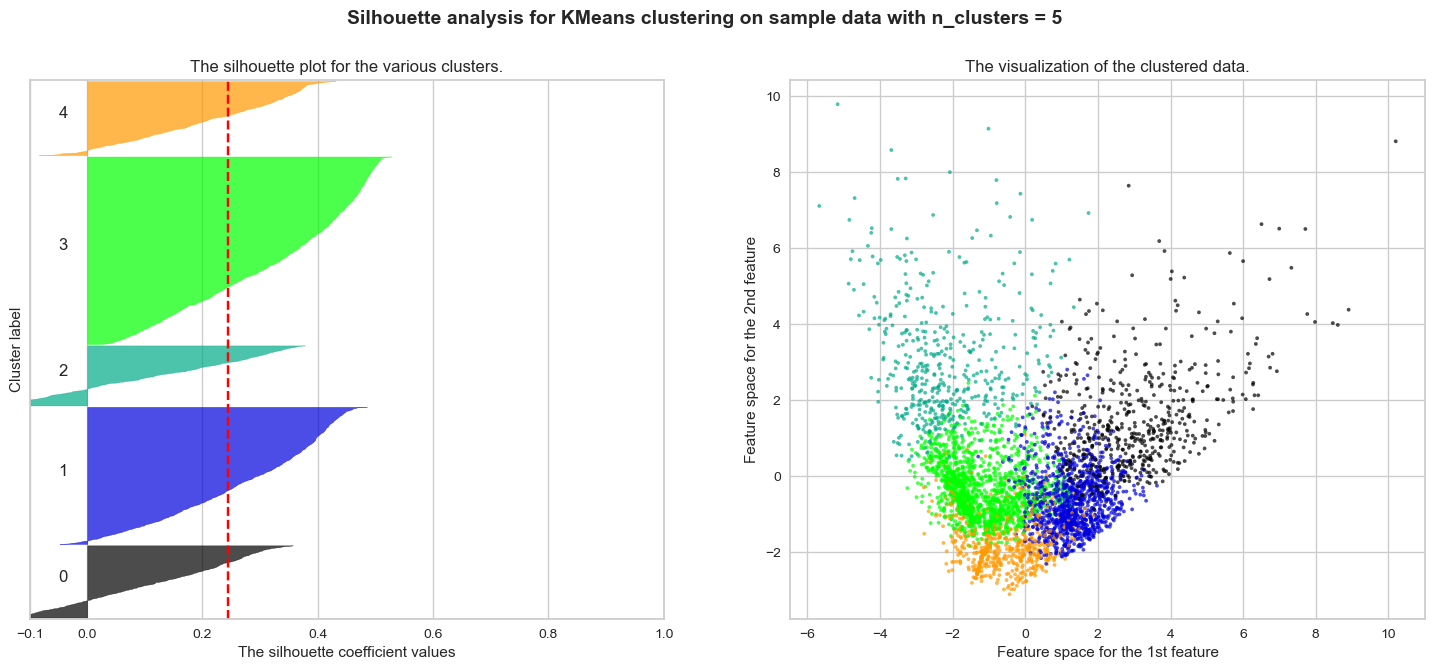

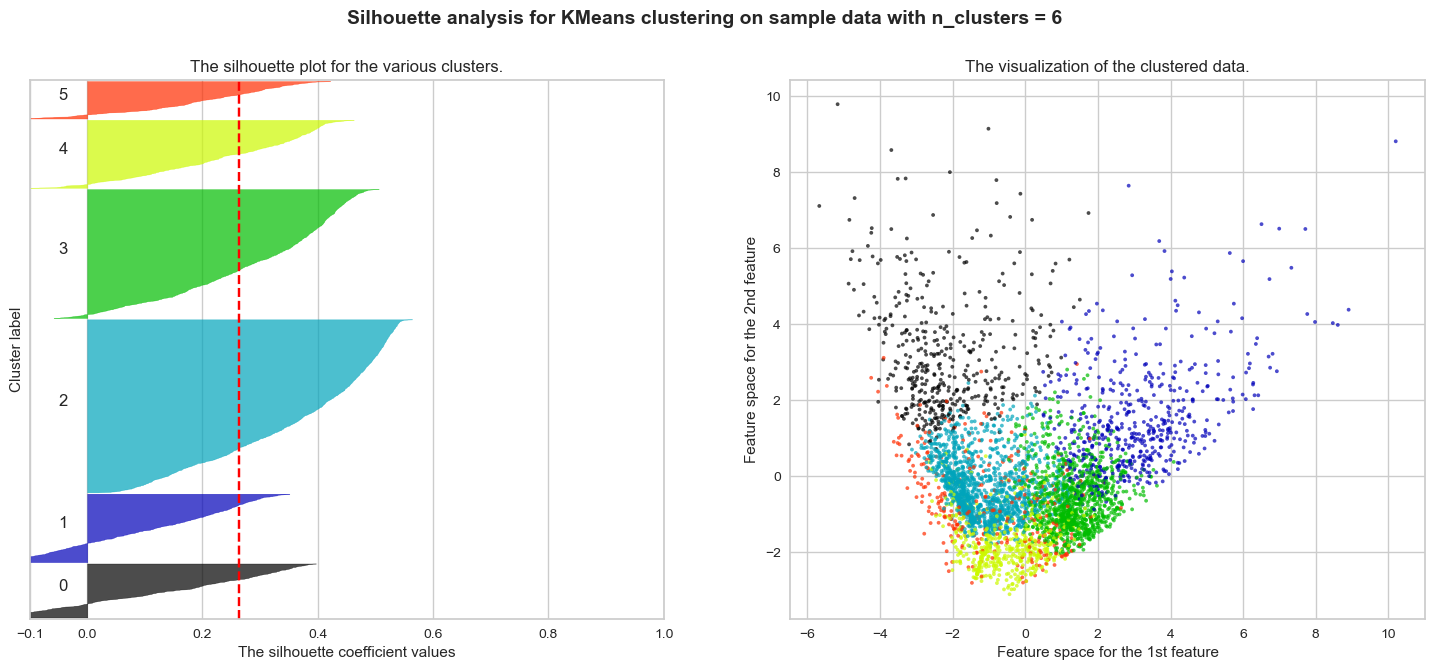

In [33]:
# Plotting the silhouette, calculate silhouette score, and visualization of clustered data
K=[2,3,4,5,6]   # Number of cluster simulated
plot_silhouette(KMeans,K,data_pca,'KMeans')

terlihat pada hasil visualisai diatas, beberapa shilouette memiliki proporsi yang tidak seimbang. jadi saya berpikir untuk mengambil nilai K dengan 2. saya memilih nilai tersebut karena pada visualisasi, nilai 2 memiliki proporsi yang hampir seimbang diantara keduanya

# vii. Model Definition

setelah menemukan nilai K yang tepat, kita akan memakai nilai tersebut untuk menjadi n cluster pada model

In [34]:
kmn =  KMeans(n_clusters=2)
km = kmn.fit_predict(data_pca)
data['Cluster'] = km
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,lof,Cluster
0,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8,1,0
1,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8,1,0
2,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8,1,0
3,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2500.0,343.102984,712.986387,0.000000,8,1,0
4,424.994385,0.375000,1200.00,1200.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,57.266292,56.720210,0.000000,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11,1,0
4182,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11,1,0
4183,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11,1,1
4184,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11,1,0


# viii. Model Evaluation

Pada bagian ini, kita akan melakukan evaluasi model.

### K-value with Elbow

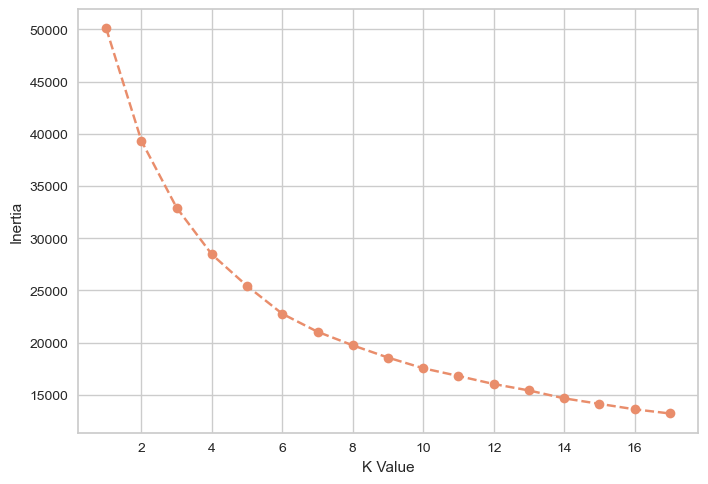

In [35]:
# Plotting elbow method to find the optimal number of cluster
K=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
inertia=[KMeans(n_clusters=i).fit(data_pca).inertia_ for i in K]
plt.plot(K,inertia,'o--')
plt.xlabel('K Value')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

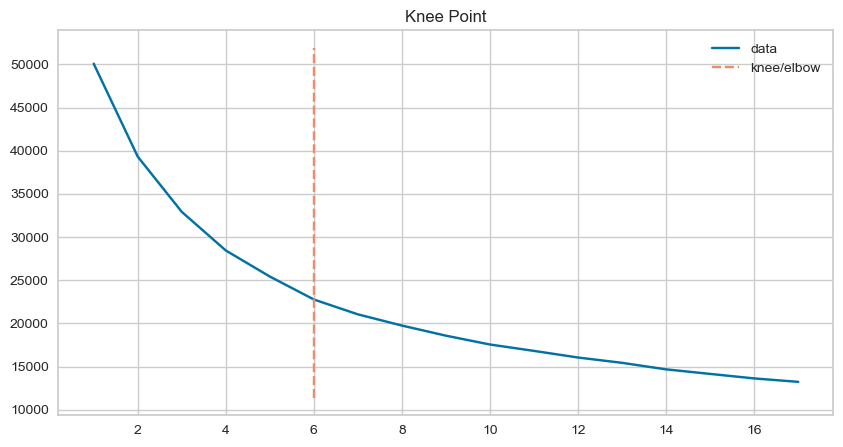

In [36]:
K=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
kneedle = KneeLocator(K,inertia,curve="convex", direction='decreasing')
kneedle.plot_knee(figsize=(10,5))

Pada hasil diatas, K-value tetap berada pada posisi yang sama seperti sebelumnya

<bound method KMeans.score of KMeans(n_clusters=2)>
<bound method KMeans.score of KMeans(n_clusters=3)>
<bound method KMeans.score of KMeans(n_clusters=4)>
<bound method KMeans.score of KMeans(n_clusters=5)>
<bound method KMeans.score of KMeans(n_clusters=6)>


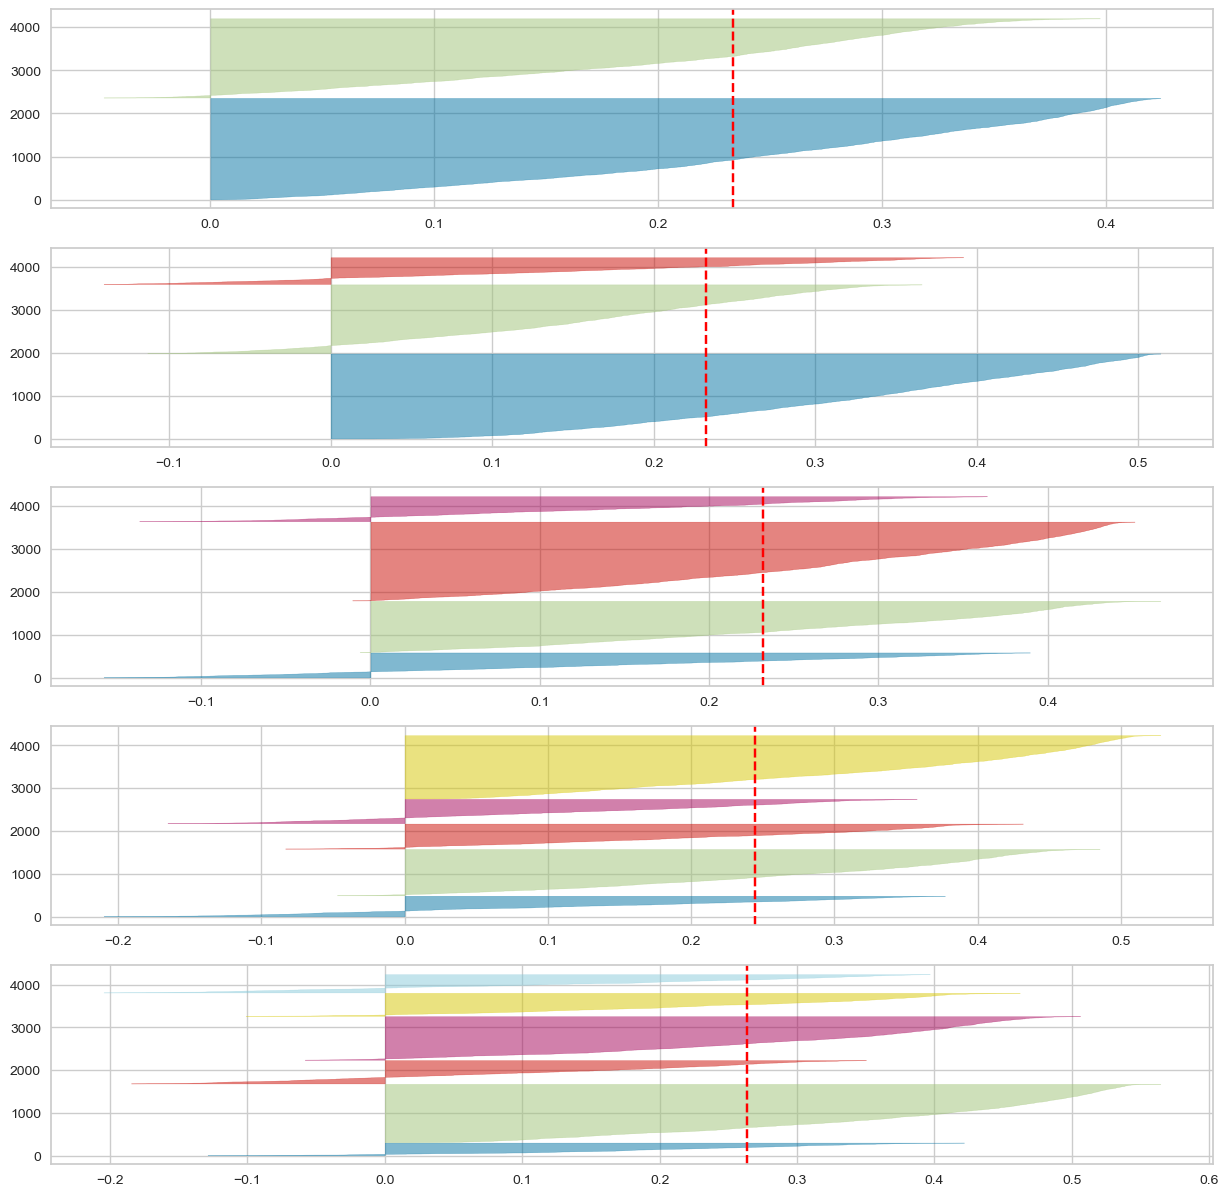

In [48]:
fig, ax = plt.subplots(5, 1, figsize = (15,15))
for i in np.arange(2,7):
  km = KMeans(n_clusters = i)
  q = (i)

  visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax[q-2])
  visualizer.fit(data_pca)
  print(km.score)

Pada hasil shilouette score diatas. meskipun pada elbow berada di nilai 6, proporsi shilouette terbaik tetap berada pada pada n cluster 2

sekarang kita akan menggabunkan data hasil modeling dan memasukkan ke dataframe

In [38]:
pca_data_kmeans= pd.concat([pca_data,pd.DataFrame({'Cluster':kmn.labels_})],axis=1)

In [39]:
cluster_center = pd.DataFrame(data=kmn.cluster_centers_,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

# ix. EDA Cluster

pada bagian ini, kita akan eksplorasi data setelah melakukan clustering

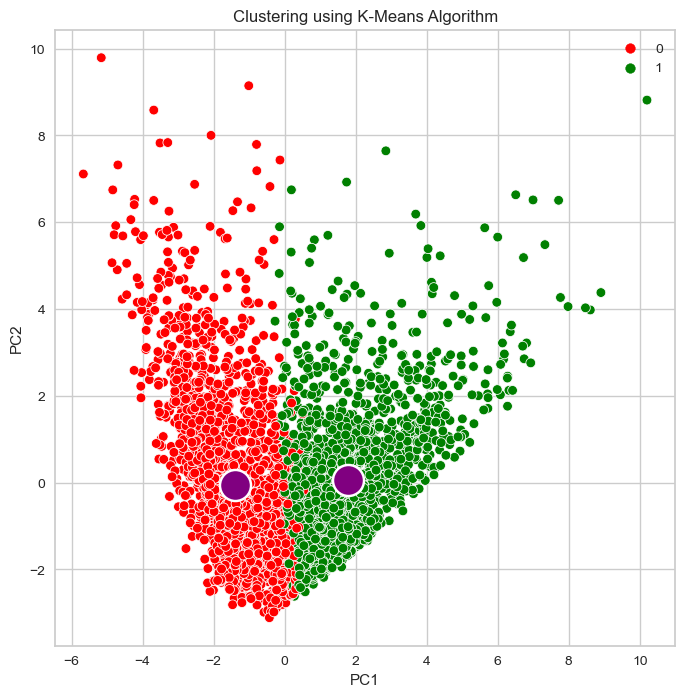

In [40]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x='PC1',y='PC2',hue="Cluster",data=pca_data_kmeans,palette=['red','green'])
ax=sns.scatterplot(x='PC1',y='PC2',data=cluster_center,s=500,color='purple')
plt.title("Clustering using K-Means Algorithm")
plt.show()

terlihat pada hasil scatterplot, pada kedua cluster memiliki proporsi yang hampir sama diantara keduanya. hal tersebut dikarenakan hasil dari shilouette score menunjukkan hasil yang serupa pada cluster 2

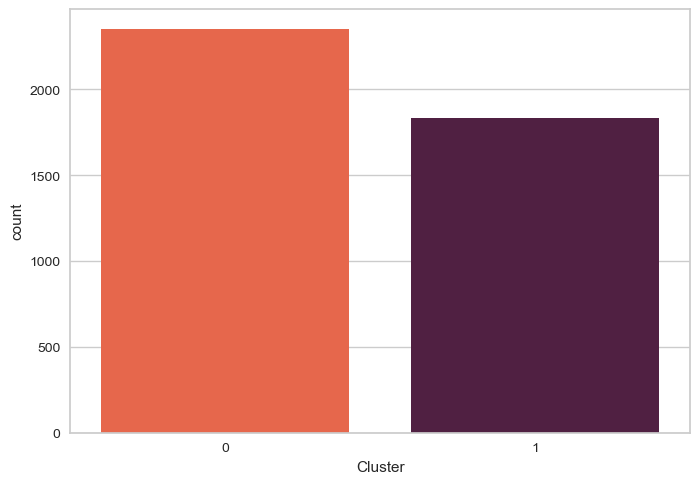

In [41]:
sns.countplot(x='Cluster', data=data, palette=['#FF5733', '#581845']);

pada visualisasi diatas menunjukan bahwa cluster 0 sedikit lebih banyak dibandingkan cluster 1. hal tersebut tidak dikatakan imbalance karna selisih masing-masing cluster tidak sampai 50%

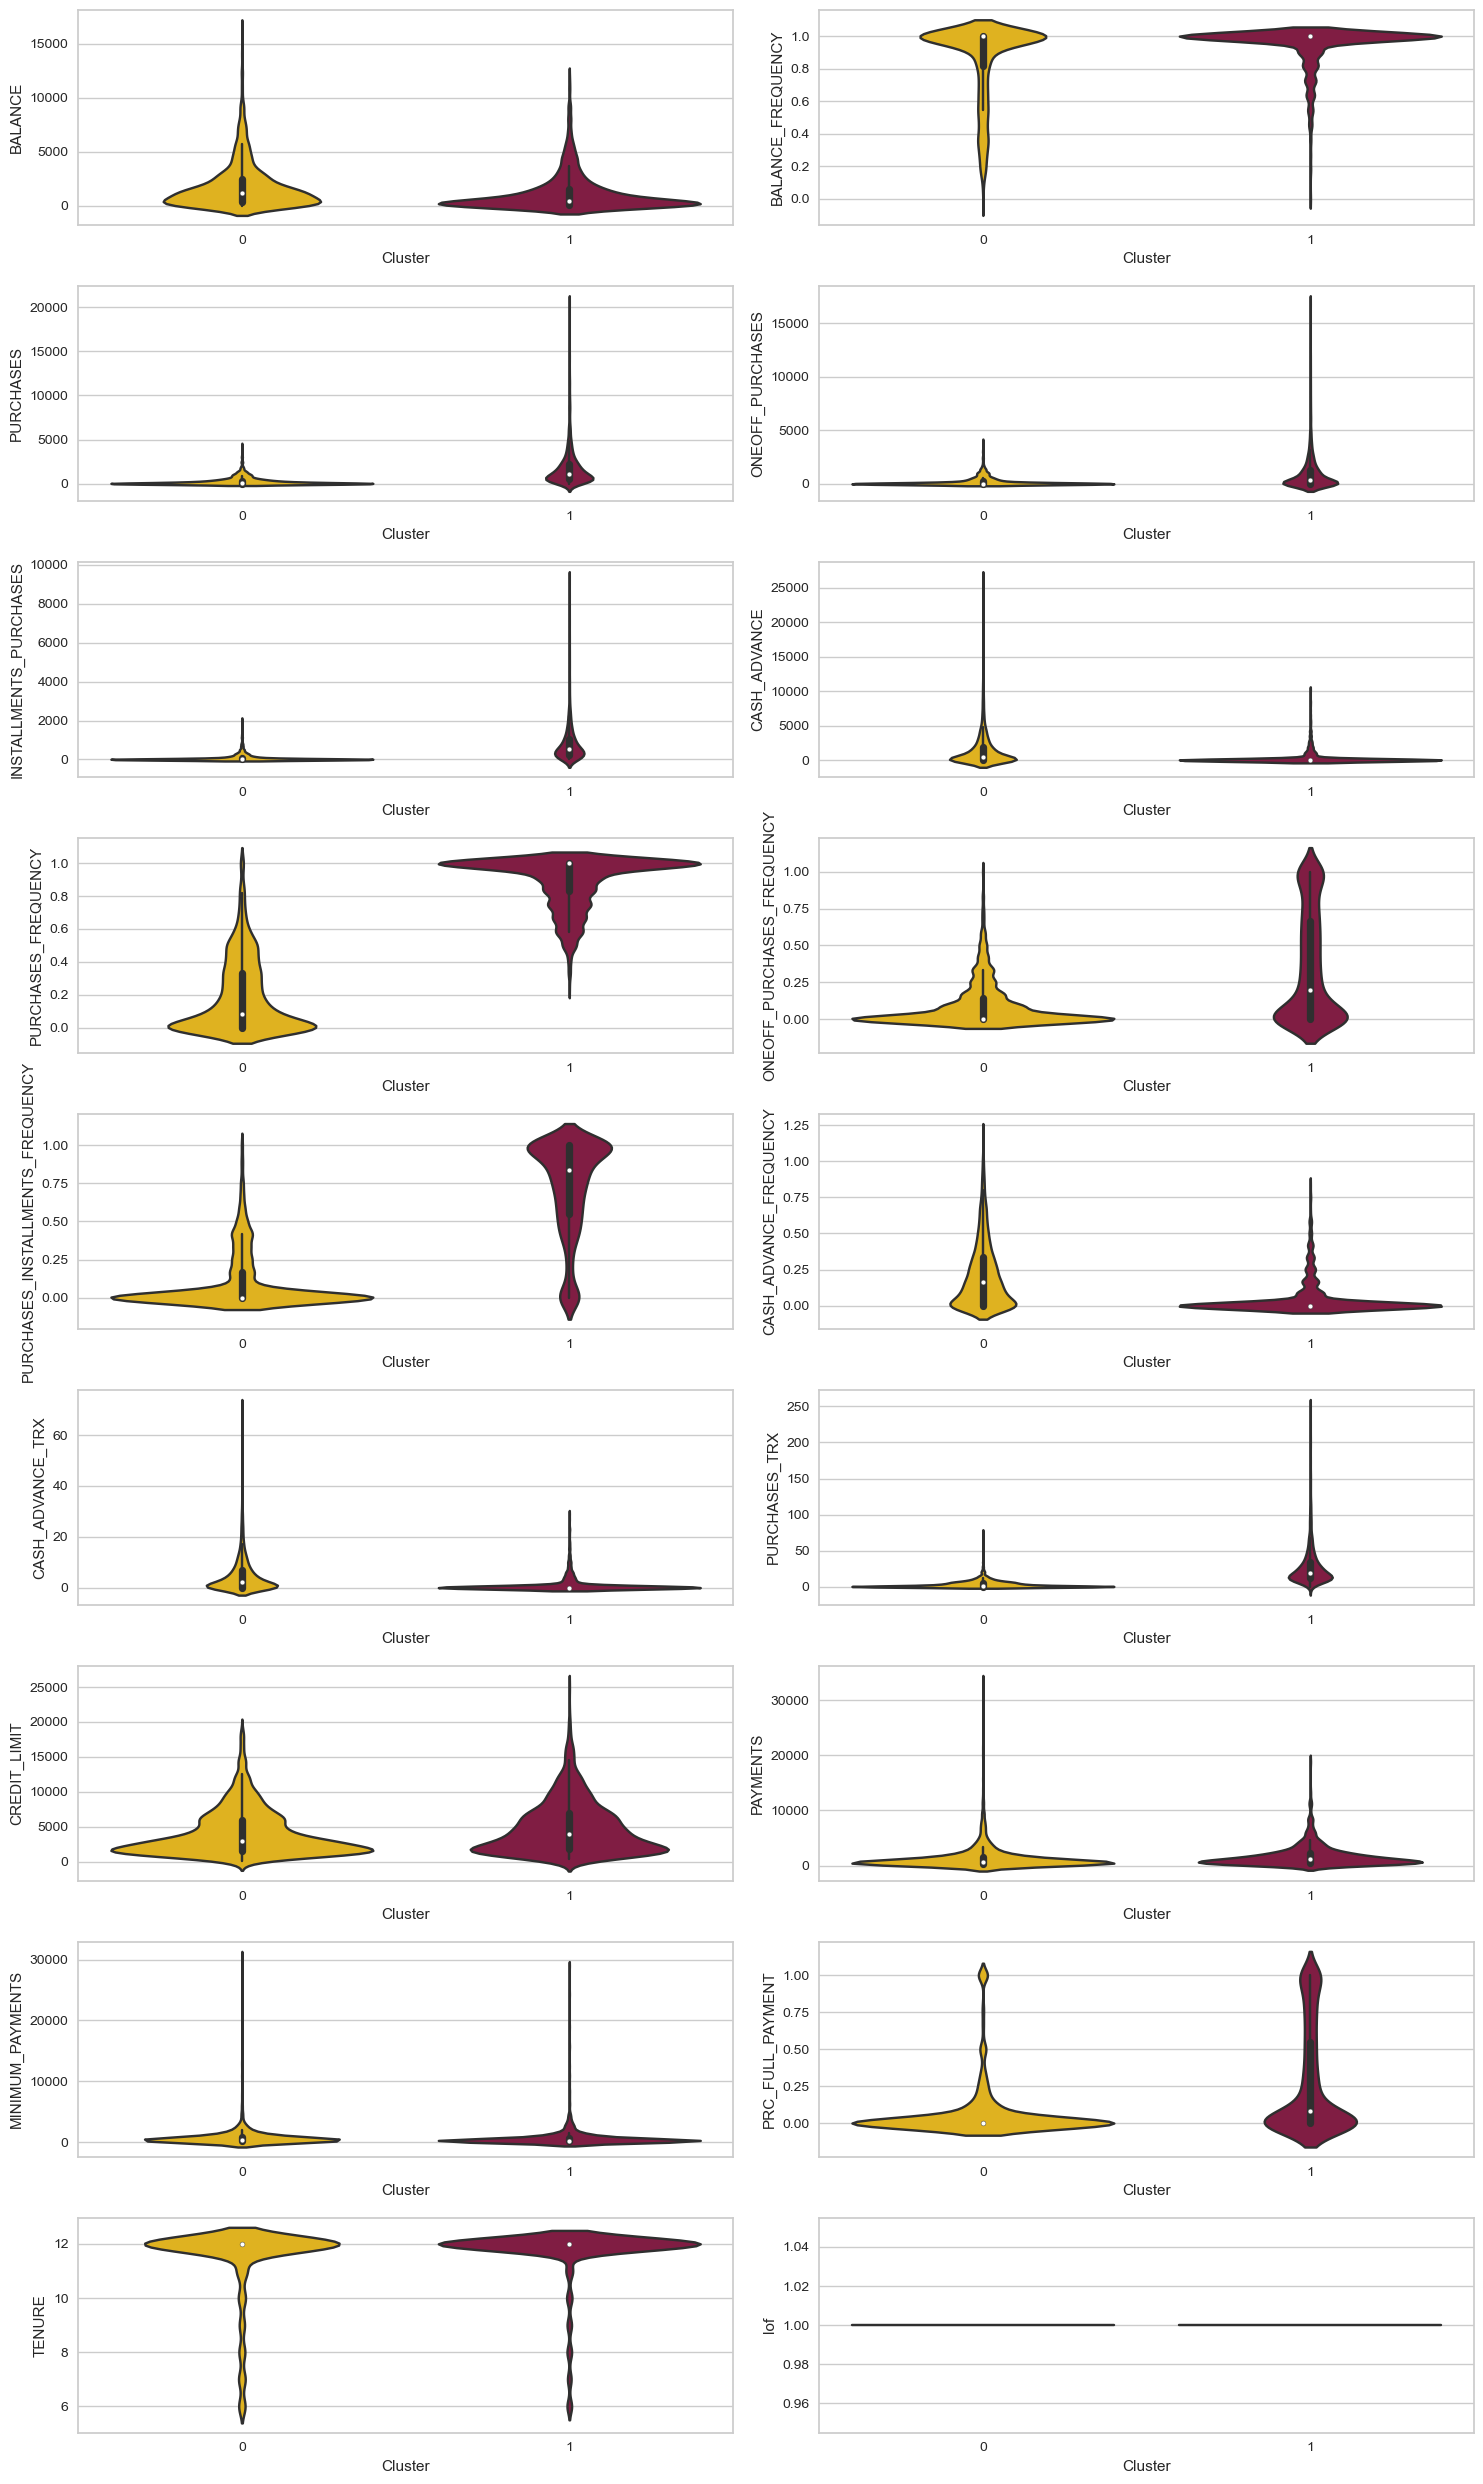

In [42]:
fig, axes = plt.subplots(9, 2, figsize=(15,25))
axes = axes.flatten()

# set a custom palette
custom_palette = ['#FFC300', '#900C3F']

for ax, col in zip(axes, data[:16]):
    vio = sns.violinplot(x=data["Cluster"], y=data[col], ax=ax, palette=custom_palette, font_scale=5)
    plt.tight_layout()

hasil visualisasi diatas terlihat beberapa visualisasi dengan bentuk violin pada semua kolom. agar leboh detail, kita akan visualisasi data dengan satu persatu

<AxesSubplot:xlabel='Cluster', ylabel='BALANCE'>

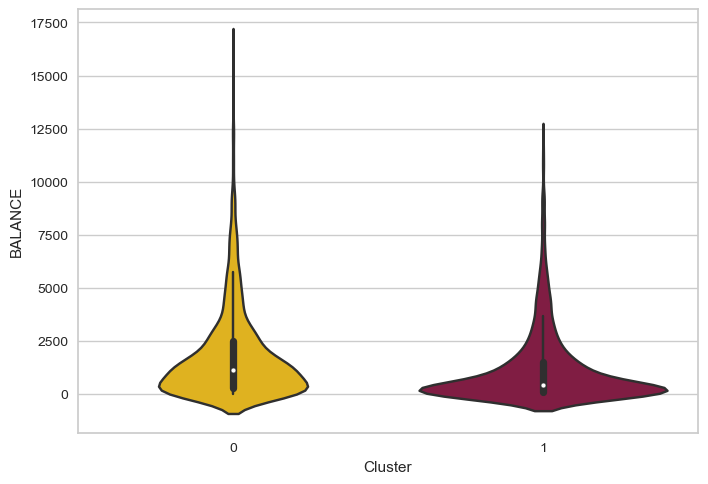

In [43]:
sns.violinplot(x=data["Cluster"], y=data['BALANCE'], palette=['#FFC300', '#900C3F'])

pada kolom balance, cluster 1 mencapai balance tertinggi pada cluster 0. Namun, frekuensi terbanyak ada pada cluster 1

<AxesSubplot:xlabel='Cluster', ylabel='BALANCE_FREQUENCY'>

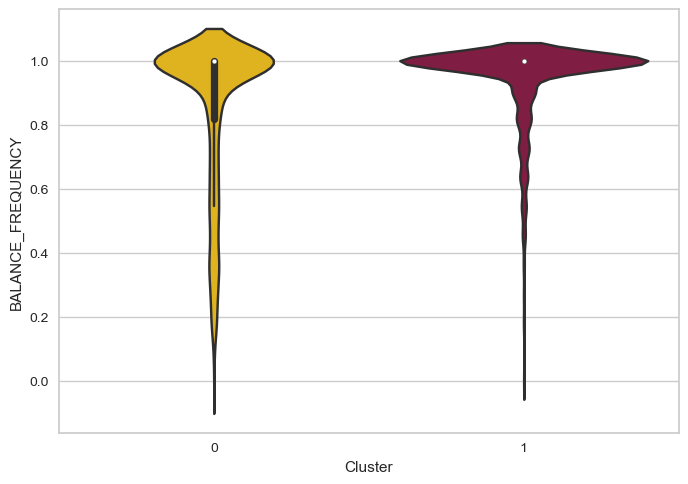

In [50]:
sns.violinplot(x=data["Cluster"], y=data["BALANCE_FREQUENCY"], palette=['#FFC300', '#900C3F'])

Pada Balance Frequency, kedua cluster memiliki hasil visualisasi yang hampir sama.Namun, Pada Cluster 1 memiliki frekuensi data yang lebih tinggi dibandingkan dengan cluster 0 

<AxesSubplot:xlabel='Cluster', ylabel='CREDIT_LIMIT'>

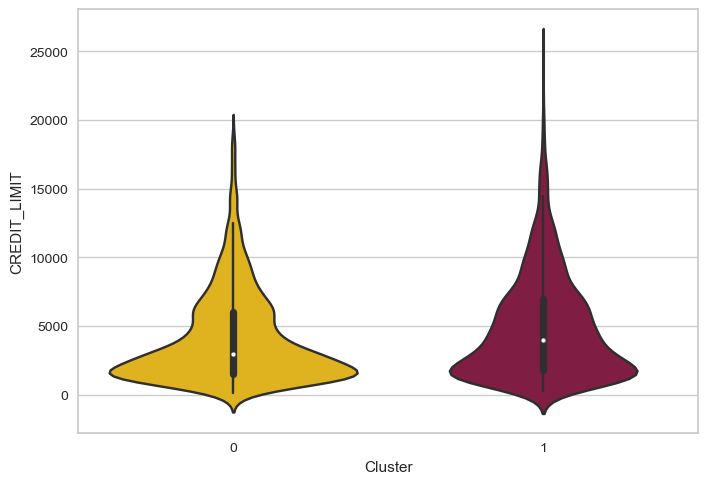

In [51]:
sns.violinplot(x=data["Cluster"], y=data['CREDIT_LIMIT'], palette=['#FFC300', '#900C3F'])

Pada kolom Limit Kredit nilai pada setiap cluster memiliki hasil visualisasi yang hampir mirip. pada cluster 1 memiliki Limit Kredit tertinggi, pada cluster 0 memiliki frekuensi tertinggi

<AxesSubplot:xlabel='Cluster', ylabel='TENURE'>

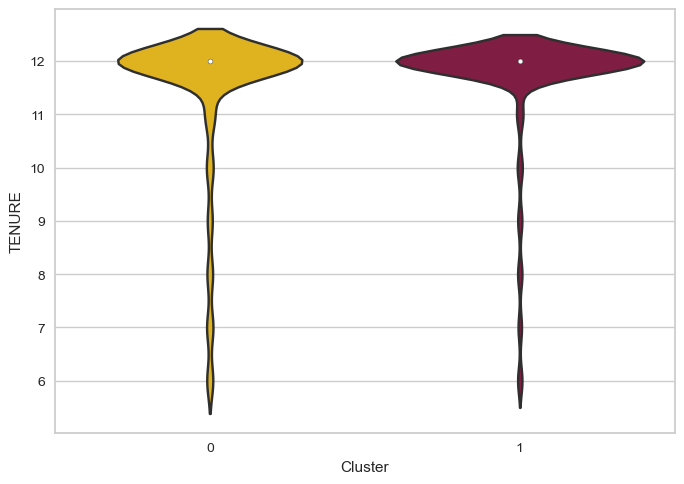

In [52]:
sns.violinplot(x=data["Cluster"], y=data["TENURE"], palette=['#FFC300', '#900C3F'])

Pada Kolom Tenor, cluster 1 memiliki frekuensi tenor tertinggi dibandingkan dengan cluster 0

# x. Conclusion

Berdasarkan hasil dari pengerjaan diatas. Kita mendapatkan beberapa kesimpulan antara lain:

1. Hasil dari PCA, kita mendapatkan nilai komponen sebesar 8 untuk menjaga 90% informasi dari data kita. hal ini dapat dikatakan baik karena, dari awal kita menggunakan 17 kolom dan di reduce menjadi 8 kolom
2. Dari hasil mencari nilai K menggunakan Elbow. kita mendapatkan titik elbow pada nilai 6. Hal itu menandakan menurut permodelan menggunakan elbow, perkiraan cluster terbaik ada pada 6
3. Dengan hasil Shilouette Score. dapat dilihat perbandingan dengan macam-macam cluster yang mendekati elbow. Pada hasil tersebut, terlihat bahwa proporsi pada n_cluster 2 memiliki proporsi yang cukup baik dibandingkan dengan yang lainnya
4. Terlihat dari hasil Scatter Plot pada bagian EDA. 2 cluster menjadi lebih baik dengan proporsi yang hampir seimbang.
5. Pada barplot, perbedaan kedua cluster tidak dapat dikatakan imbalance karena selisih diantara kedua cluster tidak terlalu jauh. 

# xi. Conceptual Problem

### Question 1

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

### Answer 1

Inertia atau intra-cluster sum of squares (SSE) adalah ukuran evaluasi kualitas klastering pada algoritma K-Means. SSE mengukur seberapa jauh titik data dalam suatu klaster dari pusat klaster atau centroid. Inertia didefinisikan sebagai jumlah jarak kuadrat antara setiap titik data dalam klaster dengan pusat klaster yang terdekat.

Source: https://blog.sanbercode.com/docs/materi-eda/clustering/

### Question 2

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

### Answer 2

Elbow Method adalah salah satu metode yang digunakan untuk menentukan jumlah klaster yang optimal dalam algoritma klastering K-Means. Tujuan utama dari Elbow Method adalah untuk menemukan titik "elbow" pada plot nilai inertia versus jumlah klaster. Pada titik ini, penurunan nilai inertia tidak signifikan lagi seiring dengan penambahan jumlah klaster.

Cara penggunaan Elbow Method adalah sebagai berikut:

- Menentukan nilai k (jumlah klaster) yang mungkin, misalnya dari 1 hingga n, di mana n adalah jumlah total titik data.
- Menghitung nilai inertia untuk setiap nilai k.
- Plot grafik nilai inertia versus jumlah klaster (k).
- Analisis grafik dan cari titik di mana penurunan nilai inertia mulai melambat dan membentuk "siku" atau "elbow".
- Nilai k yang terletak pada titik elbow dianggap sebagai jumlah klaster optimal.

Kelebihan dari Elbow Method adalah metode ini sederhana dan mudah dipahami, sehingga dapat digunakan oleh banyak pengguna tanpa pengetahuan matematika yang mendalam. Selain itu, metode ini dapat memberikan hasil yang baik jika data memiliki pola yang jelas dan cukup terpisah.

Namun, kelemahan Elbow Method adalah metode ini hanya bergantung pada visualisasi grafik, sehingga interpretasi hasil yang diperoleh tidak selalu jelas dan obyektif. Selain itu, Elbow Method juga tidak selalu dapat memberikan jumlah klaster yang optimal jika pola data tidak jelas atau terlalu kompleks. Oleh karena itu, pengguna harus berhati-hati dan mempertimbangkan hasilnya dengan hati-hati sebelum memutuskan jumlah klaster yang optimal.

Source: https://skillplus.web.id/elbow-method/

# xii. Model Saving

In [44]:
with open('model_pca.pkl', 'wb') as file_1:
  joblib.dump(pca, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('kmn_model.pkl', 'wb') as file_3:
  joblib.dump(kmn, file_3)